In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [12]:
df = pd.read_csv("customer_data.csv")  # Replace with your file path
print(df.head())  # Display the first five rows

   Customer ID  Age  Annual Income  Spending Score
0            1   56          73053              58
1            2   69          36959              86
2            3   46          20530              49
3            4   32          18748              52
4            5   60          28545              42


In [13]:
# Step 2: Data Preprocessing
features = ['Age', 'Annual Income', 'Spending Score']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])


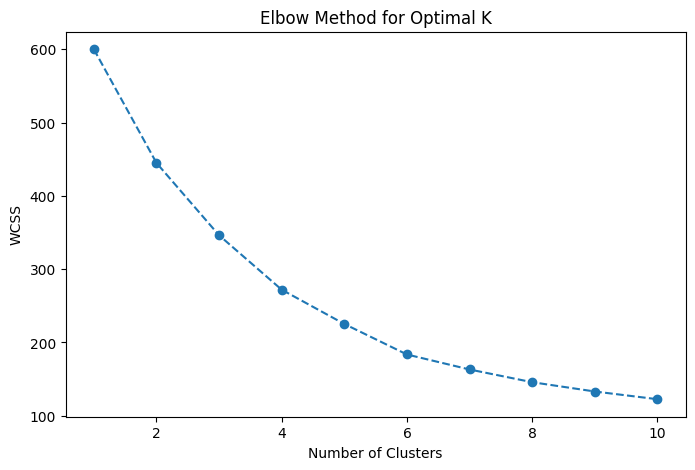

In [6]:
# Step 3: Determine Optimal Clusters (Elbow Method)
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [7]:
# Step 4: Apply K-Means Clustering (Choose K=4 based on the Elbow Method)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters

In [8]:
# Step 5: Evaluate Clustering (Silhouette Score)
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.2757


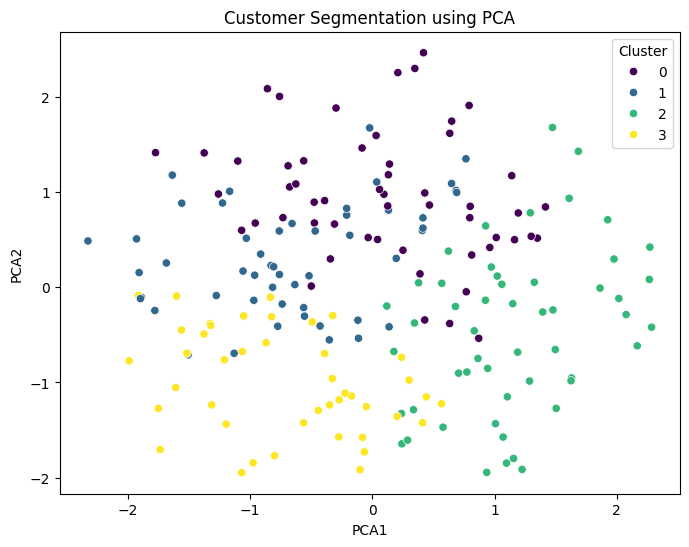

In [9]:
# Step 6: Visualization with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation using PCA')
plt.show()


In [10]:
# Step 7: Recommendations
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    avg_income = cluster_data['Annual Income'].mean()
    avg_spending = cluster_data['Spending Score'].mean()
    print(f'Cluster {cluster}: Avg Income = ${avg_income:.2f}, Avg Spending Score = {avg_spending:.2f}')
    
print("\nRecommendations:")
print("- High spending clusters should be targeted for premium products.")
print("- Low spending, high-income clusters might need incentives to increase spending.")
print("- Young, high-spending customers are ideal for loyalty programs.")

Cluster 0: Avg Income = $64339.89, Avg Spending Score = 35.52
Cluster 1: Avg Income = $79024.88, Avg Spending Score = 58.12
Cluster 2: Avg Income = $37158.04, Avg Spending Score = 81.37
Cluster 3: Avg Income = $39094.37, Avg Spending Score = 22.12

Recommendations:
- High spending clusters should be targeted for premium products.
- Low spending, high-income clusters might need incentives to increase spending.
- Young, high-spending customers are ideal for loyalty programs.
